### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single 58138.00        0   
1      2174        1954  Graduation         Single 46344.00        1   
2      4141        1965  Graduation       Together 71613.00        0   
3      6182        1984  Graduation       Together 26646.00        1   
4      5324        1981         PhD        Married 58293.00        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married 61223.00        0   
2236   4001        1946         PhD       Together 64014.00        2   
2237   7270        1981  Graduation       Divorced 56981.00        0   
2238   8235        1956      Master       Together 69245.00        0   
2239   9405        1954         PhD        Married 52869.00        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [4]:
# пропуски у доходах замінюємо на медіану (стійка до викидів)

df['Income'].fillna(df['Income'].median(), inplace=True)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_For'] = (pd.to_datetime("today") - df['Dt_Customer']).dt.days


cat_cols = ['Education', 'Marital_Status']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
df

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          2               4 58138.00        0   
1      2174        1954          2               4 46344.00        1   
2      4141        1965          2               5 71613.00        0   
3      6182        1984          2               5 26646.00        1   
4      5324        1981          4               3 58293.00        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          2               3 61223.00        0   
2236   4001        1946          4               5 64014.00        2   
2237   7270        1981          2               2 56981.00        0   
2238   8235        1956          3               5 69245.00        0   
2239   9405        1954          4               3 52869.00        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [7]:
X = df.drop(columns=['ID','Dt_Customer'])

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

silhouette = silhouette_score(X, labels)
print("Silhouette without scaling:", silhouette)

Silhouette without scaling: 0.5378509554122608


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

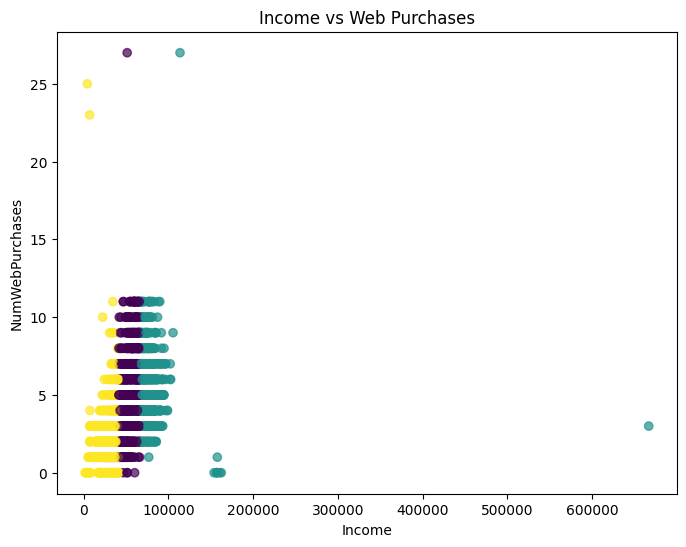

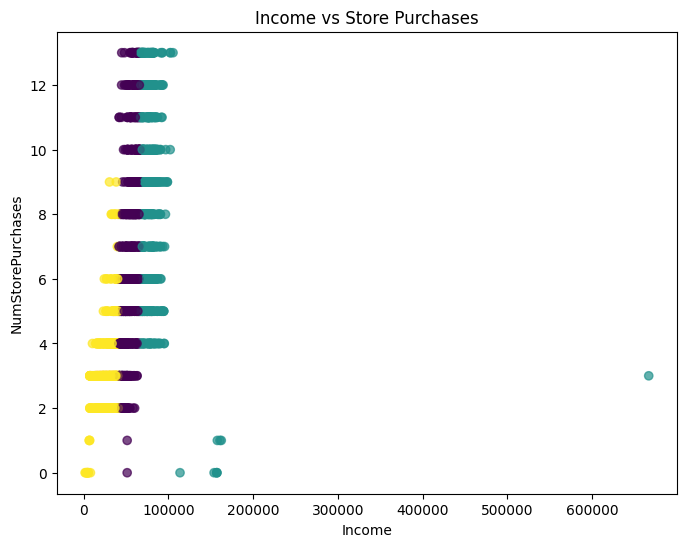

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['NumWebPurchases'], c=labels, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.title("Income vs Web Purchases")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['NumStorePurchases'], c=labels, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumStorePurchases")
plt.title("Income vs Store Purchases")
plt.show()

**Видно, що більшість клієнтів концентруються в діапазоні доходу до ~100k. Один сегмент — заможні, інший — з середнім доходом, третій — з низьким доходом.**

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

silhouette_scaled = silhouette_score(X_scaled, labels_scaled)
print("Silhouette after scaling:", silhouette_scaled)

Silhouette after scaling: 0.15762356785090736


**До масштабування силует набагато вищий. Після масштабування всі ознаки стали одного масштабу і кластери вже не такі чіткі. Тут дохід є домінуючою характеристикою і без масштабування алгоритм краще відокремлює сегменти.**

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [10]:
# видалимо клієнтів з доходом > 99-го перцентиля

q99 = df['Income'].quantile(0.99)
df_clean = df[df['Income'] < q99]

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

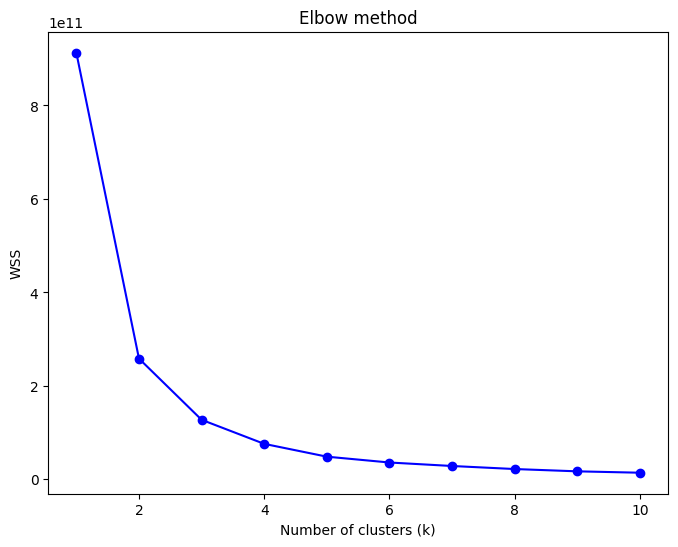

In [11]:
X_clean = df_clean.drop(columns=['ID','Dt_Customer'])

wss = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_clean)
    wss.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, wss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
plt.title("Elbow method")
plt.show()

In [12]:
optimal_k = 3 
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
labels_opt = kmeans_opt.fit_predict(X_clean)

silhouette_opt = silhouette_score(X_clean, labels_opt)
print(f"Silhouette (k={optimal_k}):", silhouette_opt)

Silhouette (k=3): 0.5548776024937375


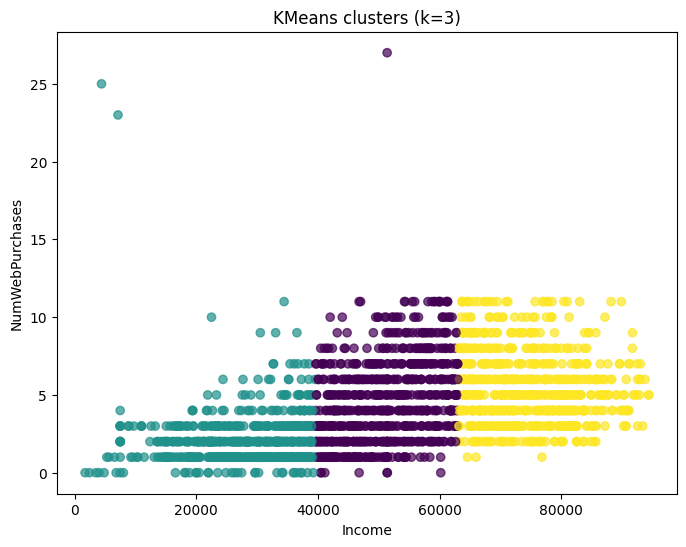

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Income'], df_clean['NumWebPurchases'], c=labels_opt, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.title(f"KMeans clusters (k={optimal_k})")
plt.show()

**Для цього датасету краще брати немасштабовані очищені дані, адже вони дають кращий силует і логічні сегменти (доходи справді добре відрізняють клієнтів).**

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

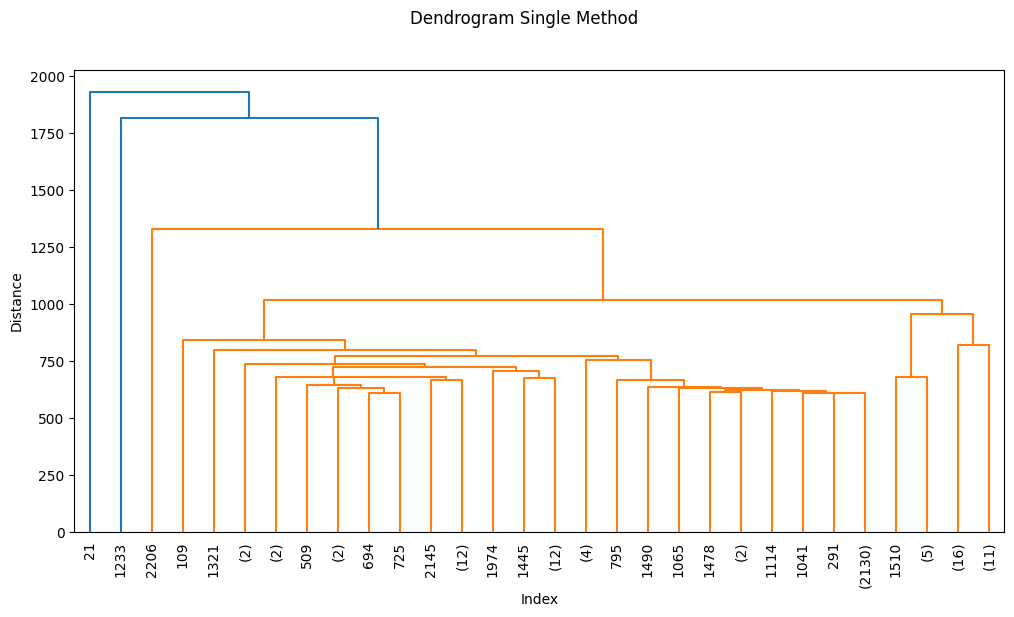

In [14]:
dist_sin = linkage(X_clean, method='single')

plt.figure(figsize=(12,6))
dendrogram(dist_sin, truncate_mode='lastp', leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method")
plt.show()

In [15]:
df_clean['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
df_clean['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

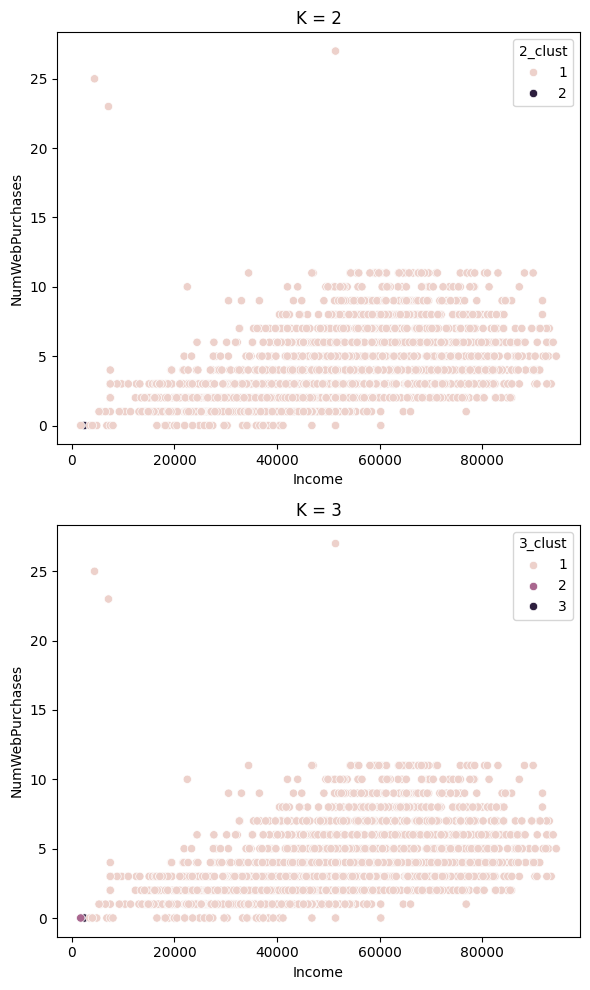

In [16]:
plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
plt.title("K = 2")
sns.scatterplot(
    x="Income", y="NumWebPurchases",
    data=df_clean, hue="2_clust"
)

plt.subplot(2,1,2)
plt.title("K = 3")
sns.scatterplot(
    x="Income", y="NumWebPurchases",
    data=df_clean, hue="3_clust"
)

plt.tight_layout();

In [17]:
sil_2 = silhouette_score(X_clean, df_clean['2_clust'])
sil_3 = silhouette_score(X_clean, df_clean['3_clust'])

print("Silhouette (2 clusters):", sil_2)
print("Silhouette (3 clusters):", sil_3)

Silhouette (2 clusters): 0.4246534259134259
Silhouette (3 clusters): 0.4252963075899061


**Метрика силуету показала середній рівень якості, на візуалізаціях кластери не відокремлюються чітко. У порівнянні з KMeans кластери виглядають набагато менш інтерпретованими.**

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

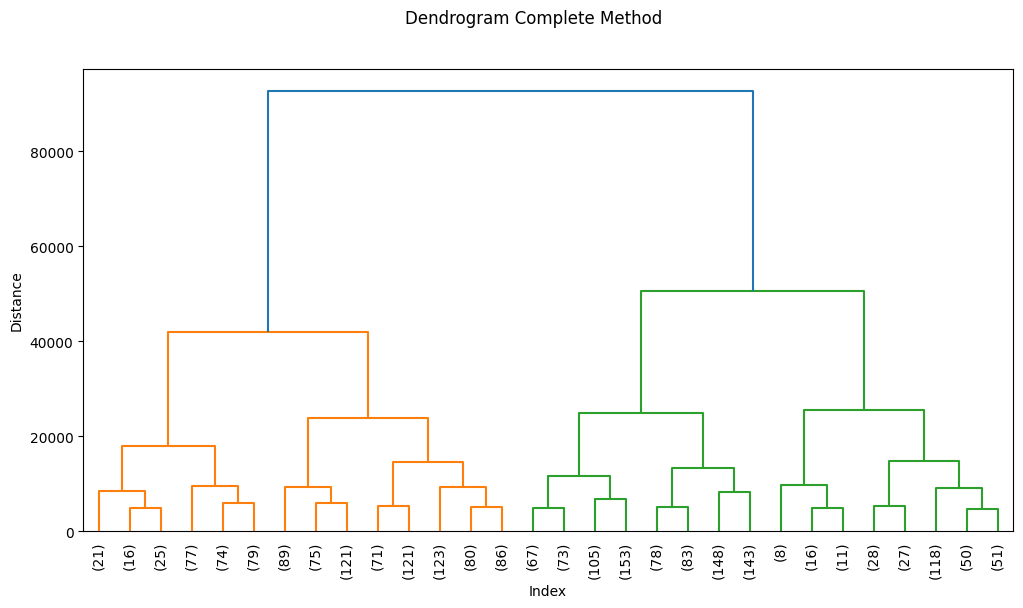

In [18]:
dist_comp = linkage(X_clean, method="complete")

plt.figure(figsize=(12,6))
dendrogram(dist_comp, truncate_mode='lastp', leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method")
plt.show()

df_clean['2_clust_CM'] = fcluster(dist_comp, 2, criterion='maxclust')
df_clean['3_clust_CM'] = fcluster(dist_comp, 3, criterion='maxclust')

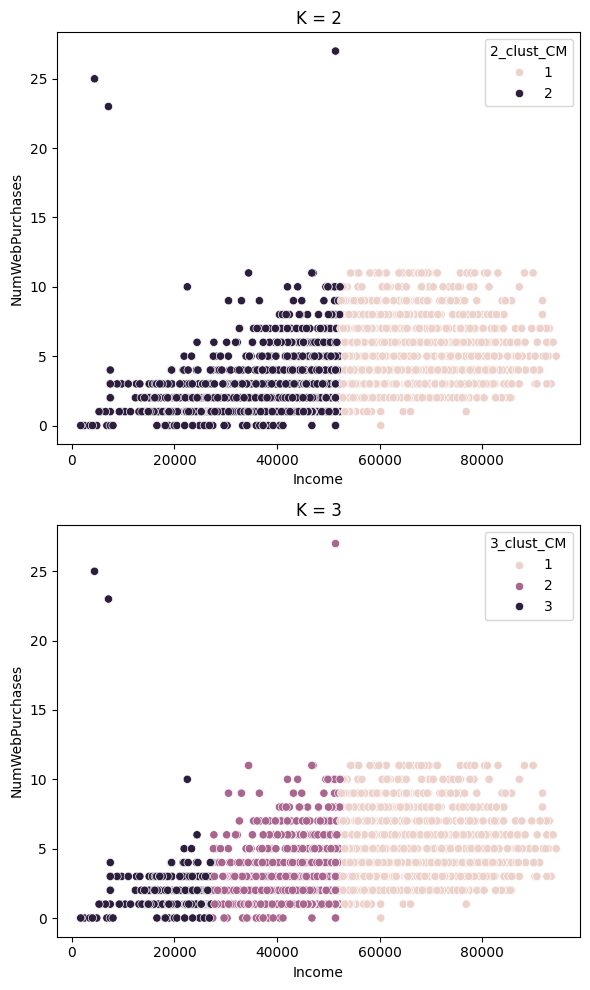

In [19]:
plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
plt.title("K = 2")
sns.scatterplot(x="Income", y="NumWebPurchases", data=df_clean, hue="2_clust_CM")

plt.subplot(2,1,2)
plt.title("K = 3")
sns.scatterplot(x="Income", y="NumWebPurchases", data=df_clean, hue="3_clust_CM")

plt.tight_layout();

In [20]:
sil_2_cm = silhouette_score(X_clean, df_clean['2_clust_CM'])
sil_3_cm = silhouette_score(X_clean, df_clean['3_clust_CM'])

print("Silhouette (Complete linkage, 2 clusters):", sil_2_cm)
print("Silhouette (Complete linkage, 3 clusters):", sil_3_cm)

Silhouette (Complete linkage, 2 clusters): 0.6044806897857807
Silhouette (Complete linkage, 3 clusters): 0.5306568914932632


**Метод Complete linkage для агломеративної кластеризації виявився найбільш вдалим серед протестованих. Кластери добре інтерпретуються, метрика силуету вища, ніж у KMeans і Single linkage.**

Number of clusters DBSCAN: 3
Silhouette DBSCAN: 0.4496905147196437


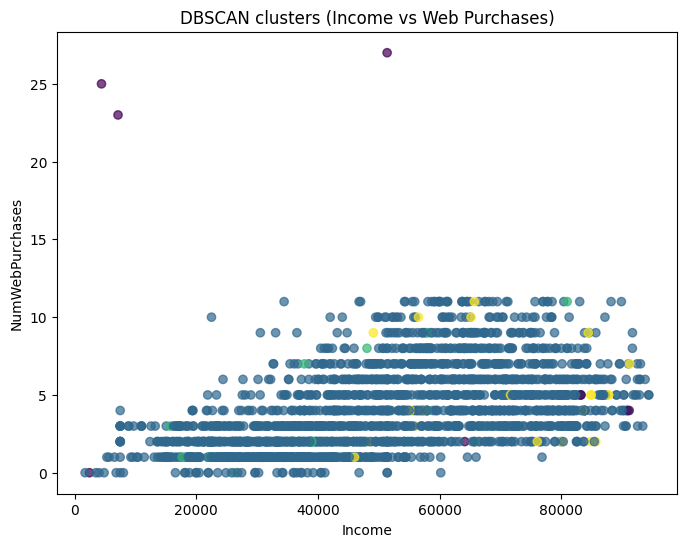

In [21]:
X_scaled = StandardScaler().fit_transform(X_clean)

dbscan = DBSCAN(eps=8, min_samples=15)
db_labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Number of clusters DBSCAN:", n_clusters)

if n_clusters > 1:
    print("Silhouette DBSCAN:", silhouette_score(X_scaled, db_labels))
else:
    print("Silhouette DBSCAN: impossible to calculate")

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Income'], df_clean['NumWebPurchases'], c=db_labels, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.title("DBSCAN clusters (Income vs Web Purchases)")
plt.show()

**Для маркетингової сегментації DBSCAN не є ефективним, можливе використання як додаткового інструменту для виявлення аномальних клієнтів.**